In [698]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [725]:
df = pd.read_csv("C:/Users/user/Desktop/abalone.csv",index_col=0)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [726]:
df['Age'] = df['Rings'] + 1.5
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
id,,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5


In [701]:
# 결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
dtype: int64

In [727]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [728]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [729]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

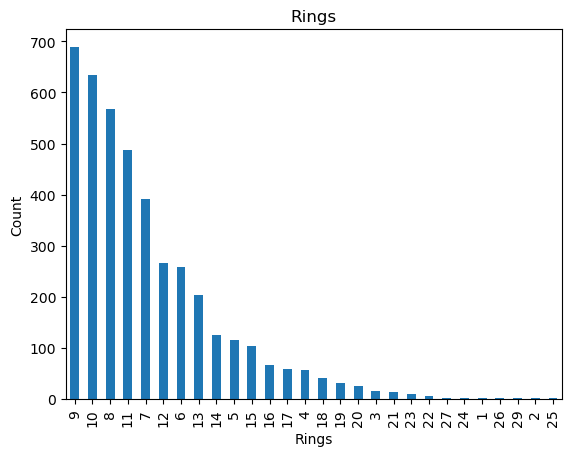

In [704]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Rings')
plt.xlabel('Rings')
plt.ylabel('Count')

In [730]:
import pandas as pd

# 기존 abalone 데이터셋 로드
# 데이터가 abalone.csv 파일에 있다고 가정

# rings=1인 데이터와 rings=29인 데이터 추출
rings_1_data = df[df['Rings'] == 1].copy()
rings_29_data = df[df['Rings'] == 29].copy()

# rings=1인 데이터를 rings=0으로 변경
rings_1_data['Rings'] = 0

# rings=29인 데이터를 rings=28로 변경
rings_29_data['Rings'] = 28

# 기존 데이터에 rings=0과 rings=28 데이터를 추가
df = pd.concat([df, rings_1_data, rings_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

In [731]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

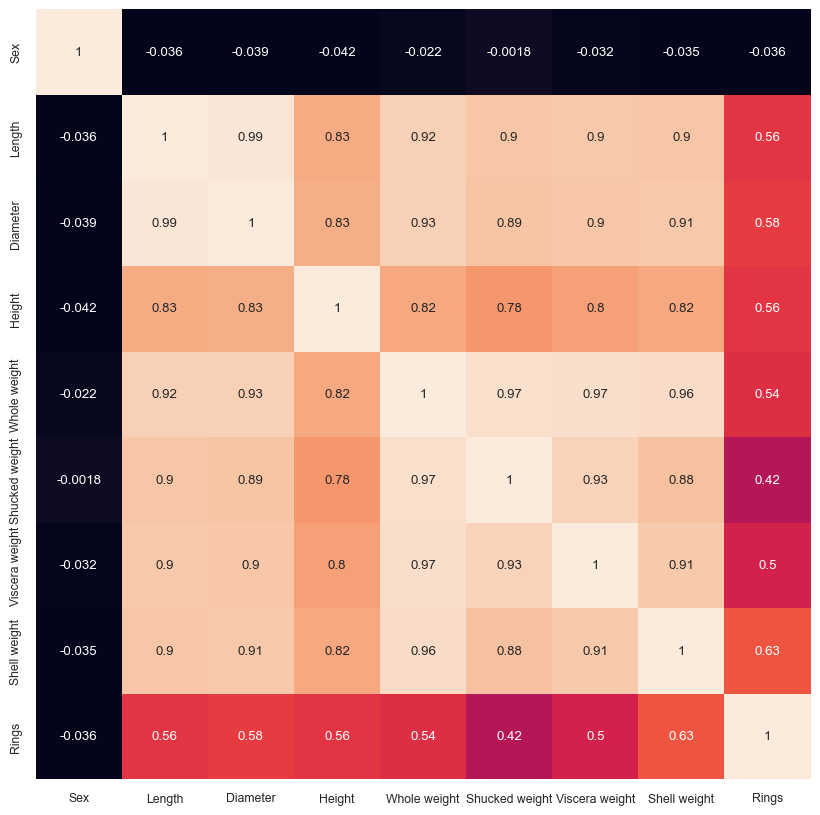

In [732]:
df_corr = df[[ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [733]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

In [745]:
X_ring=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X_ring.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [746]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

In [747]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [748]:
Y = pd.get_dummies(y).values

In [749]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950
4177,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015


In [750]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4174     9
4175    10
4176    12
4177     0
4178    28
Name: Rings, Length: 4179, dtype: int64

In [751]:
new_df = df.copy()

In [752]:
new_df['newRings_1'] = np.where(df['Rings'] <= 8, 1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10, 3,0)

new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [753]:
y_ring = new_df['newRings']
y_ring.value_counts().sort_index(ascending=True)

newRings
1    1408
2    1323
3    1448
Name: count, dtype: int64

In [754]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [755]:
#one hot encoding 하기

y_ring = pd.get_dummies(y_ring).values
y_ring

array([[False, False,  True],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False, False,  True],
       [ True, False, False],
       [False, False,  True]])

In [756]:
from sklearn.model_selection import train_test_split

X_ring_train, X_ring_test, y_ring_train, y_ring_test = train_test_split(X_ring, y_ring, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_ring_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2788,0.615,0.460,0.150,1.0265,0.4935,0.2010,0.2745
1752,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
2224,0.550,0.425,0.145,0.7970,0.2970,0.1500,0.2650
3389,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300
3851,0.560,0.440,0.130,0.8255,0.2425,0.2020,0.2850
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [757]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_ring_train)
X_ring_train = pd.DataFrame(scaler.transform(X_ring_train), columns=X_ring.columns)
X_ring_test = pd.DataFrame(scaler.transform(X_ring_test), columns=X_ring.columns)

In [758]:
X_ring_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.732948,0.501811,0.221653,0.370960,0.571376,0.156254,0.229588
1,1.524491,1.512691,1.850403,2.376329,2.487103,2.442738,2.324811
2,0.191366,0.148003,0.105314,-0.094626,-0.308158,-0.304658,0.161304
3,0.316346,0.552355,0.221653,0.577887,0.049922,1.525433,0.628507
4,0.274686,0.299635,-0.243704,-0.036809,-0.552099,0.165292,0.305059
...,...,...,...,...,...,...,...
3129,1.024569,1.158883,1.036028,1.579051,1.336771,1.254309,1.685103
3130,1.066229,0.906163,-0.011025,0.663093,0.781748,1.209121,0.305059
3131,0.566307,0.400723,0.105314,0.234023,0.434858,0.205960,0.078645
3132,0.816268,0.805075,0.570671,0.574844,0.497522,0.477085,0.545848


In [759]:
y_ring_test.shape[1]

3

In [760]:
def split_sequences(sequences, n_steps, n_features):
    X, y = list(), list()
    for i in range(len(sequences)):
        # 시퀀스의 끝점 계산
        end_ix = i + n_steps
        # 데이터 범위를 넘어서면 중단
        if end_ix > len(sequences):
            break
        # 입력 시퀀스는 n_steps 동안의 데이터 (마지막 레이블 제외)
        seq_x = sequences[i:end_ix, :n_features]
        # 출력은 end_ix 시점에서 30개의 레이블만 가져옴
        seq_y = sequences[end_ix-1, n_features:]  # 특정 시점에서 한 번에 30개의 레이블만 가져오기
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [761]:
# Merge train and test X/y data to apply sequence transformation function
y_ring_train_array = np.array(y_ring_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
ring_train_set = np.c_[X_ring_train, y_ring_train_array]

y_ring_test_array = np.array(y_ring_test)
ring_test_set = np.c_[X_ring_test, y_ring_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(ring_test_set)

[[ 1.19120934  1.05779512  0.68701044 ...  0.          0.
   1.        ]
 [ 1.27452966  1.51269105  1.26870674 ...  0.          0.
   1.        ]
 [-1.51670092 -1.57049248 -1.05807848 ...  1.          0.
   0.        ]
 ...
 [ 0.27468587  0.35017923  0.91968896 ...  0.          1.
   0.        ]
 [-1.60002124 -1.62103647 -1.17441775 ...  1.          0.
   0.        ]
 [ 0.4413265   0.50181121 -0.01102513 ...  0.          1.
   0.        ]]


In [762]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_ring_train, y_ring_train = split_sequences(ring_train_set, 5, X_ring_test.shape[1])
print(X_ring_train.shape, y_ring_train.shape)

X_ring_test, y_ring_test = split_sequences(ring_test_set, 5, X_ring_test.shape[1])
print(X_ring_test.shape, y_ring_test.shape)   

(3130, 5, 7) (3130, 3)
(1041, 5, 7) (1041, 3)


In [763]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_ring_train.shape[1], X_ring_train.shape[2], y_ring_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 7 3


In [764]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv1D, Flatten
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

In [765]:
# Define the model architecture
inputs = Input(shape=(n_timesteps, n_features,))

x = Conv1D(32, 2, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = Flatten()(x)
predictions = Dense(n_outputs, activation='softmax')(x)  # 클래스 수에 맞춰 수정

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model with categorical_crossentropy
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 5, 7)]            0         
                                                                 
 conv1d_60 (Conv1D)          (None, 4, 32)             480       
                                                                 
 dense_138 (Dense)           (None, 4, 64)             2112      
                                                                 
 dropout_9 (Dropout)         (None, 4, 64)             0         
                                                                 
 flatten_47 (Flatten)        (None, 256)               0         
                                                                 
 dense_139 (Dense)           (None, 3)                 771       
                                                                 
Total params: 3,363
Trainable params: 3,363
Non-trainable 

In [766]:
ring_model_history=model.fit(x=X_ring_train, y=y_ring_train, epochs=50, batch_size=32, validation_split = 0.2, shuffle = True)
pred_DL = model.predict(X_ring_test)

y_ring_test_class = np.argmax(y_ring_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_ring_pred_class = np.argmax(pred_DL, axis=1)

Epoch 1/50
79/79 [==============================] - 5s 48ms/step - loss: 0.9699 - accuracy: 0.5148 - val_loss: 0.8763 - val_accuracy: 0.5559
Epoch 2/50
79/79 [==============================] - 3s 38ms/step - loss: 0.8732 - accuracy: 0.5647 - val_loss: 0.8570 - val_accuracy: 0.5751
Epoch 3/50
79/79 [==============================] - 3s 36ms/step - loss: 0.8449 - accuracy: 0.5791 - val_loss: 0.8430 - val_accuracy: 0.5815
Epoch 4/50
79/79 [==============================] - 3s 39ms/step - loss: 0.8269 - accuracy: 0.5923 - val_loss: 0.8370 - val_accuracy: 0.5783
Epoch 5/50
79/79 [==============================] - 3s 40ms/step - loss: 0.8195 - accuracy: 0.5974 - val_loss: 0.8288 - val_accuracy: 0.5958
Epoch 6/50
79/79 [==============================] - 3s 43ms/step - loss: 0.8044 - accuracy: 0.6114 - val_loss: 0.8143 - val_accuracy: 0.5911
Epoch 7/50
79/79 [==============================] - 3s 39ms/step - loss: 0.7920 - accuracy: 0.6218 - val_loss: 0.7988 - val_accuracy: 0.6102
Epoch 8/50
79

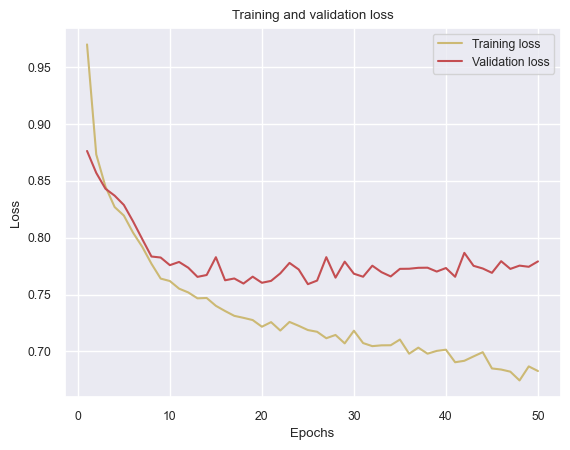

In [767]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = ring_model_history.history['loss']
val_loss = ring_model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

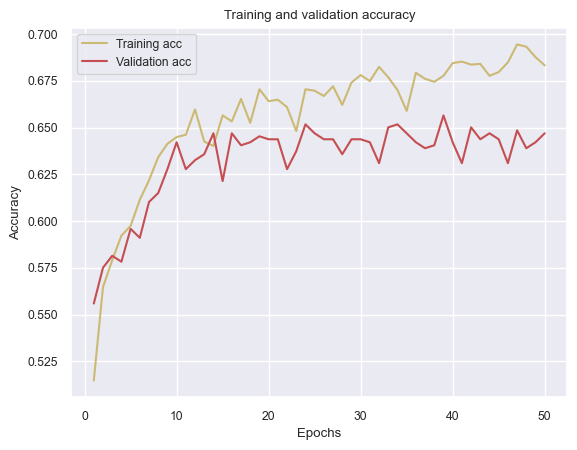

In [769]:
acc =ring_model_history.history['accuracy']
val_acc =ring_model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [770]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_ring_test_class, y_ring_pred_class))
print(confusion_matrix(y_ring_test_class, y_ring_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       387
           1       0.49      0.47      0.48       297
           2       0.69      0.69      0.69       357

    accuracy                           0.66      1041
   macro avg       0.65      0.65      0.65      1041
weighted avg       0.66      0.66      0.66      1041

[[303  66  18]
 [ 64 140  93]
 [ 31  81 245]]


In [771]:
base_loss,base_accuracy=model.evaluate(X_ring_test, y_ring_test)

model_file='C:/Project/DeepLearning/Data/Abalone_model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 [==============================] - 0s 2ms/step - loss: 0.7546 - accuracy: 0.6609
model saved at  C:/Project/DeepLearning/Data/Abalone_model.h5
Accuracy >66.090298
Base Loss >0.75


In [772]:
# Base 모델을 로드 (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)


In [773]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  6


<font size="7">전이 학습 및 미세 조정 </font>

In [774]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5
4177,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,0,2.5


In [776]:
X_new=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X_new.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [777]:
y_new = df['Sex']
y_new.value_counts().sort_index(ascending=True)

Sex
0    1308
1    1343
2    1528
Name: count, dtype: int64

In [778]:
#one hot encoding 하기

y_new = pd.get_dummies(y_new).values
y_new

array([[False, False,  True],
       [False, False,  True],
       [ True, False, False],
       ...,
       [False, False,  True],
       [False,  True, False],
       [ True, False, False]])

In [780]:
from sklearn.model_selection import train_test_split

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_new_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2788,0.615,0.460,0.150,1.0265,0.4935,0.2010,0.2745
1752,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
2224,0.550,0.425,0.145,0.7970,0.2970,0.1500,0.2650
3389,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300
3851,0.560,0.440,0.130,0.8255,0.2425,0.2020,0.2850
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [783]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_new_train)
X_new_train = pd.DataFrame(scaler.transform(X_new_train), columns=X_new.columns)
X_new_test = pd.DataFrame(scaler.transform(X_new_test), columns=X_new.columns)

In [784]:
X_new_test.shape[1]

7

In [785]:
y_new_test.shape[1]

3

In [786]:
# Merge train and test X/y data to apply sequence transformation function
y_new_train_array = np.array(y_new_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
new_train_set = np.c_[X_new_train, y_new_train_array]

y_new_test_array = np.array(y_new_test)
new_test_set = np.c_[X_new_test, y_new_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(new_test_set)


[[ 1.19120934  1.05779512  0.68701044 ...  1.          0.
   0.        ]
 [ 1.27452966  1.51269105  1.26870674 ...  1.          0.
   0.        ]
 [-1.51670092 -1.57049248 -1.05807848 ...  0.          1.
   0.        ]
 ...
 [ 0.27468587  0.35017923  0.91968896 ...  1.          0.
   0.        ]
 [-1.60002124 -1.62103647 -1.17441775 ...  0.          0.
   1.        ]
 [ 0.4413265   0.50181121 -0.01102513 ...  0.          1.
   0.        ]]


In [787]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_new_train, y_new_train = split_sequences(new_train_set, 5, X_new_test.shape[1])
print(X_new_train.shape, y_new_train.shape)

X_new_test, y_new_test = split_sequences(new_test_set, 5, X_new_test.shape[1])
print(X_new_test.shape, y_new_test.shape)   

(3130, 5, 7) (3130, 3)
(1041, 5, 7) (1041, 3)


### 기존의 출력층을 빼고 새로운 모델에 해당 레이어들 추가

In [788]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# LA모델의 출력층부터 1개의 레이어를 삭제 -> 출력층을 RA에 맞게 변경한다 (전이학습)
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(y_new_test.shape[1], activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 4, 32)             480       
                                                                 
 dense_138 (Dense)           (None, 4, 64)             2112      
                                                                 
 dropout_9 (Dropout)         (None, 4, 64)             0         
                                                                 
 flatten_47 (Flatten)        (None, 256)               0         
                                                                 
 dense_140 (Dense)           (None, 3)                 771       
                                                                 
Total params: 3,363
Trainable params: 3,363
Non-trainable params: 0
_________________________________________________________________


In [789]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_60,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_138,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout_9,True
3,<keras.layers.reshaping.flatten.Flatten object...,flatten_47,True
4,<keras.layers.core.dense.Dense object at 0x000...,dense_140,True


In [792]:
new_model_history=new_model.fit(x=X_new_train, y=y_new_train, epochs=50, batch_size=32, validation_split = 0.2, shuffle = True)
pred_DL = new_model.predict(X_new_test)

y_new_test_class = np.argmax(y_new_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_new_pred_class = np.argmax(pred_DL,axis=1)

Epoch 1/50
79/79 [==============================] - 4s 55ms/step - loss: 0.7608 - accuracy: 0.6354 - val_loss: 0.8967 - val_accuracy: 0.5016
Epoch 2/50
79/79 [==============================] - 3s 40ms/step - loss: 0.7569 - accuracy: 0.6386 - val_loss: 0.8999 - val_accuracy: 0.5032
Epoch 3/50
79/79 [==============================] - 3s 38ms/step - loss: 0.7548 - accuracy: 0.6386 - val_loss: 0.8965 - val_accuracy: 0.5048
Epoch 4/50
79/79 [==============================] - 3s 40ms/step - loss: 0.7513 - accuracy: 0.6298 - val_loss: 0.8961 - val_accuracy: 0.4904
Epoch 5/50
79/79 [==============================] - 3s 32ms/step - loss: 0.7551 - accuracy: 0.6438 - val_loss: 0.9021 - val_accuracy: 0.5080
Epoch 6/50
79/79 [==============================] - 1s 16ms/step - loss: 0.7569 - accuracy: 0.6346 - val_loss: 0.9054 - val_accuracy: 0.4984
Epoch 7/50
79/79 [==============================] - 3s 41ms/step - loss: 0.7443 - accuracy: 0.6462 - val_loss: 0.9123 - val_accuracy: 0.4968
Epoch 8/50
79

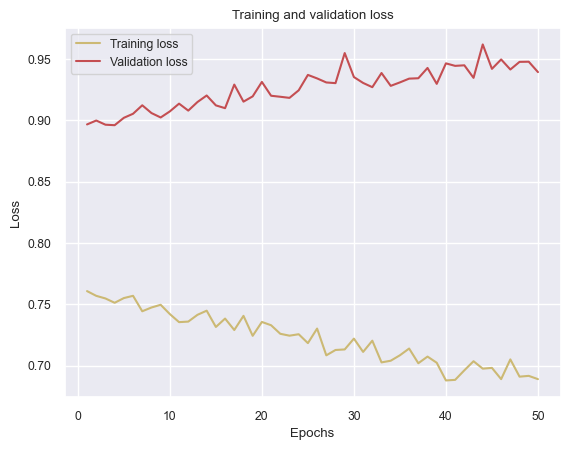

In [793]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = new_model_history.history['loss']
val_loss = new_model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

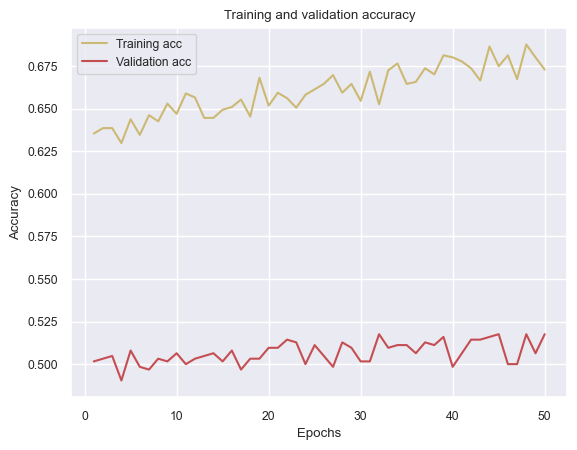

In [794]:
acc =new_model_history.history['accuracy']
val_acc =new_model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [795]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           2       0.80      0.80      0.80         5
           3       0.50      0.09      0.15        11
           4       0.40      0.18      0.25        33
           5       0.64      1.00      0.78        47
           6       1.00      1.00      1.00        98
           7       1.00      1.00      1.00       113
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       107
          10       1.00      1.00      1.00        95
          11       1.00      1.00      1.00        66
          12       0.71      1.00      0.83        39
          13       0.00      0.00      0.00        26
          14       0.37      1.00      0.54        18
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        10
          17       0.18      1.00      0.30         5
          18       0.00      0.00      0.00         8
          19       0.00    

C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


미세조정

In [796]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [797]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_60,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_138,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout_9,True
3,<keras.layers.reshaping.flatten.Flatten object...,flatten_47,True
4,<keras.layers.core.dense.Dense object at 0x000...,dense_140,True


In [799]:
new_model_history_2=new_model.fit(x=X_new_train, y=y_new_train, epochs=50, batch_size=32, validation_split = 0.2, shuffle = True)

new_model.summary()

Epoch 1/50
79/79 [==============================] - 4s 55ms/step - loss: 0.6819 - accuracy: 0.6849 - val_loss: 0.9620 - val_accuracy: 0.5000
Epoch 2/50
79/79 [==============================] - 5s 58ms/step - loss: 0.6760 - accuracy: 0.6937 - val_loss: 0.9646 - val_accuracy: 0.5096
Epoch 3/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6723 - accuracy: 0.6897 - val_loss: 0.9775 - val_accuracy: 0.4984
Epoch 4/50
79/79 [==============================] - 4s 49ms/step - loss: 0.6722 - accuracy: 0.6901 - val_loss: 0.9675 - val_accuracy: 0.5128
Epoch 5/50
79/79 [==============================] - 5s 65ms/step - loss: 0.6707 - accuracy: 0.6937 - val_loss: 0.9656 - val_accuracy: 0.5096
Epoch 6/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6760 - accuracy: 0.6985 - val_loss: 0.9712 - val_accuracy: 0.5016
Epoch 7/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6744 - accuracy: 0.6837 - val_loss: 0.9584 - val_accuracy: 0.4952
Epoch 8/50
79

In [800]:
new_model.evaluate(X_new_train, y_new_train)

98/98 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7272


[0.6408202648162842, 0.7271565198898315]

In [801]:
new_model.evaluate(X_ring_train, y_ring_train)

98/98 [==============================] - 0s 2ms/step - loss: 2.3834 - accuracy: 0.2738


[2.3834002017974854, 0.27380192279815674]